# Goal = To predict population of India

In [123]:
#import requied packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [124]:
#import dataset
data = pd.read_csv('Downloads//population.csv')
data.head(3)

,Year,Yearly % \nChange,Yearly\nChange,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban\nPop %,Urban Population,Country's Share of\nWorld Pop,World Population,India\nGlobal Rank,Population
0,2050,0.23,3711367,NaN,38.1,2.24,551,53.5,876613025,16.84,9735033990,1,1639176033
1,2045,0.35,5585537,-414772.0,36.6,2.24,545,50.1,811749463,17.09,9481803274,1,1620619200
2,2040,0.50,7793541,-415736.0,35.0,2.24,536,46.7,744380367,17.31,9198847240,1,1592691513


In [125]:
data.iloc[:,6].corr(data['Population'])

0.9999980575544165

In [126]:
data.shape

(24, 13)

# Linear Regression

In [127]:
#pre checks
data.isnull().sum()

Year                             0
Yearly % \nChange                0
Yearly\nChange                   0
Migrants (net)                   1
Median Age                       0
Fertility Rate                   0
Density (P/Km²)                  0
Urban\nPop %                     0
Urban Population                 0
Country's Share of\nWorld Pop    0
World Population                 0
India\nGlobal Rank               0
Population                       0
dtype: int64

In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          24 non-null     int64  
 1   Yearly % 
Change              24 non-null     float64
 2   Yearly
Change                 24 non-null     int64  
 3   Migrants (net)                23 non-null     float64
 4   Median Age                    24 non-null     float64
 5   Fertility Rate                24 non-null     float64
 6   Density (P/Km²)               24 non-null     int64  
 7   Urban
Pop %                   24 non-null     float64
 8   Urban Population              24 non-null     int64  
 9   Country's Share of
World Pop  24 non-null     float64
 10  World Population              24 non-null     object 
 11  India
Global Rank             24 non-null     int64  
 12  Population                    24 non-null     int64  
dtypes: floa

In [129]:
data.head(2)

,Year,Yearly % \nChange,Yearly\nChange,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban\nPop %,Urban Population,Country's Share of\nWorld Pop,World Population,India\nGlobal Rank,Population
0,2050,0.23,3711367,NaN,38.1,2.24,551,53.5,876613025,16.84,9735033990,1,1639176033
1,2045,0.35,5585537,-414772.0,36.6,2.24,545,50.1,811749463,17.09,9481803274,1,1620619200


In [135]:
#Mark X and y
X = data.iloc[:,6].values
y = data.Population.values

In [136]:
print(X.size)
print(y.size)

24
24


In [137]:
Xmean = np.mean(X)
ymean = np.mean(y)

In [138]:
n = len(X)
t = 0
b = 0
for i in range(n):
    t += (X[i]-Xmean)*(y[i]-ymean)
    b += (X[i]-Xmean)**2
m = t/b
c = ymean-m*Xmean
ypredict=m*X+c

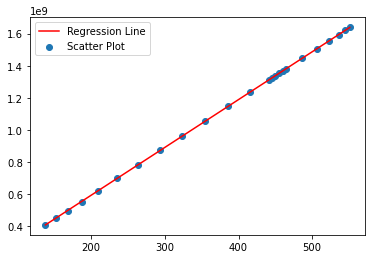

In [139]:
plt.plot(X,ypredict,color='r',label='Regression Line')
plt.scatter(X,y,label='Scatter Plot')
plt.legend()
plt.show()

# Check accuracy of model

In [140]:
ss_t = 0
ss_r = 0
for i in range(n):
    ypredict = m*X[i]+c
    ss_t += (y[i]-ymean)**2
    ss_r += (y[i]-c)**2
    rsquare = 1-(ss_r/ss_t)
rsquare.mean()

0.999996115112606

# Linear Regression using Sklearn

In [164]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score

In [165]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=5)

In [166]:
X_test = np.array(X_test).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)
X_train = np.array(X_train).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)

In [167]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [168]:
predict = model.predict(X_test)

In [169]:
r2_score(y_test,predict)

0.9999971642709015